# State Police Of Virginia Crime Statistics 

The 2016 Data Set is available at the following URL:  
http://www.vsp.state.va.us/Crime_in_Virginia.shtm  

In [1]:
import requests, json, os

The PDF Report for 2016 is available at :  
http://www.vsp.state.va.us/downloads/Crime_in_Virginia/Crime%20in%20Virginia%202016.pdf  
We will check to see if the URL structure will allow us to buld download the reports from 1999 and upward.  

# Grabbing the PDF Reports

In [2]:
def urlGETter(paramaterList,):
    #os.mkdir('reports')
    for x in paramaterList:
        try:
            if x == 1999:     
                report = requests.get("http://www.vsp.state.va.us/downloads/Crime_in_Virginia/crimeinvirginia.pdf".format(x))
            else:
                report = requests.get("http://www.vsp.state.va.us/downloads/Crime_in_Virginia/Crime_in_Virginia_{}.pdf".format(x))
                if report.status_code == 404:
                    report = requests.get("http://www.vsp.state.va.us/downloads/Crime_in_Virginia/Crime in VA {}.pdf".format(x))
            with open(os.path.join('reports', 'Crime in Virginia {}.pdf'.format(str(x))), 'wb') as f:
                f.write(report.content)
        except:
            print("could not find correct URL Pattern for {}".format(x))
    print('complete')

In [3]:
urlGETter(range(1999,2017))

complete


The Data is not in Excel format.  a Script would have to be written to extract the tables from the PDF's.  

# Importing Data

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
df = pd.read_csv(os.path.join('data','CrimeByCounty.csv'))

In [8]:
df = df.astype({'Violent\ncrime':int,'Murder and\nnonnegligent\nmanslaughter':int,'Rape\n(revised\ndefinition)1':int,
       'Robbery':int, 'Aggravated\nassault':int, 'Property\ncrime':int, 'Burglary':int,
       'Larceny-\ntheft':int, 'Motor\nvehicle\ntheft':int, 'Arson':int})

In [9]:
df

,Metropolitan/ Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Metropolitan Counties,"Albemarle County, VA",88,1,29,NaN,21,37,1271,145,1061,65,8
1,Metropolitan Counties,"Amelia County, VA",18,2,6,NaN,2,8,125,28,87,10,0
2,Metropolitan Counties,"Amherst County, VA",32,1,13,NaN,6,12,279,35,222,22,2
3,Metropolitan Counties,"Appomattox County, VA",14,0,5,NaN,2,7,129,18,107,4,0
4,Metropolitan Counties,"Arlington County, VA",363,1,56,NaN,103,203,3252,170,2912,170,5
5,Metropolitan Counties,"Augusta County, VA",65,4,11,NaN,3,47,715,206,467,42,5
6,Metropolitan Counties,"Bedford County, VA",40,1,11,NaN,4,24,478,107,347,24,2
7,Metropolitan Counties,"Botetourt County, VA",36,0,14,NaN,1,21,234,34,187,13,0
8,Metropolitan Counties,"Buckingham County, VA",18,0,4,NaN,2,12,145,26,108,11,1
9,Metropolitan Counties,"Campbell County, VA",112,6,15,NaN,8,83,612,104,479,29,0


In [10]:
top10_Violent = df.nlargest(10, 'Violent\ncrime')

In [11]:
%matplotlib inline

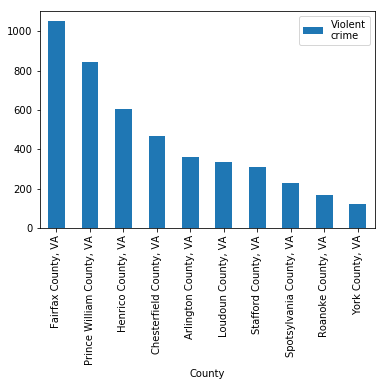

In [12]:
top10_Violent.plot.bar(x='County', y='Violent\ncrime', rot='90')

In [13]:
top20_Robbery = df.nlargest(20, 'Robbery')

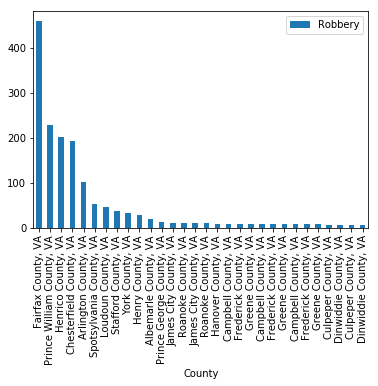

In [14]:
top20_Robbery.plot.bar(x='County', y='Robbery', rot='vertical')

In [15]:
GEO = requests.get('http://catalog.civicdashboards.com/dataset/0f854062-ad27-483f-bf47-28397d15ffad/resource/9dd40375-d30e-41cc-9e8e-e6fb26b42bf9/download/3c4266dce6ec422cb63b4cc53cbdcaa9temp.geojson')

In [16]:
VirginiaCounties = json.loads(GEO.content.decode())

In [17]:
import folium

In [35]:
def mapStat(GeoJson, df, key_column, value_column):
    Virginia_map = folium.Map(location=[37.5, -79],
                   tiles='Mapbox Bright', zoom_start=7)
    Virginia_map.choropleth(geo_path=GeoJson, 
                        data=df, columns=(key_column, value_column), key_on='feature.properties.name',
                        fill_color='YlGn',
                        threshold_scale = list(np.linspace(df[value_column].min(), df[value_column].max(), 6)),
                        fill_opacity=.5,
                        reset=True,
                        highlight=True)
    report = df.nlargest(3, value_column)
    return Virginia_map

In [36]:
df.columns

Index(['Metropolitan/ Nonmetropolitan', 'County', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

In [37]:
from ipywidgets import interact, widgets, interactive

In [38]:
def quickWidget(field):
    return mapStat('data/VirginiCounties.GeoJSON', df, 'County', field)
interact(quickWidget, field= [x for x in df.columns if x not in ['County', 'Metropolitan/ Nonmetropolitan']])

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.quickWidget>